### Data Analysis derived from St. Lous Federal Reserve 

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px


In [5]:
plt.style.use('fivethirtyeight')
#limit the structure of the dataframe to 500 columns 
pd.set_option('max_columns',500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

#### 1. Create the FRED object

In [6]:
fred_key = 'df809b73738237f2b49d112d1763034d'

fred = Fred(api_key=fred_key)

#### 2. Search for economic data through FRED

In [11]:
sp_search = fred.search('S&P',order_by='popularity')

In [12]:
sp_search.head(5)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-08-21,2022-08-21,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-08-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-19 09:31:02-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-08-21,2022-08-21,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-07-26 08:02:02-05:00,89,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-08-21,2022-08-21,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-08-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-08-19 09:31:09-05:00,84,This data represents the effective yield of th...
SP500,SP500,2022-08-21,2022-08-21,S&P 500,2012-08-20,2022-08-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-08-19 19:13:40-05:00,82,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2022-08-21,2022-08-21,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-07-26 08:02:05-05:00,81,"For more information regarding the index, plea..."


#### 3. Pull Raw Data

In [14]:
sp500 = fred.get_series(series_id='SP500')

In [16]:
sp500.head(10)

2012-08-20    1418.13
2012-08-21    1413.17
2012-08-22    1413.49
2012-08-23    1402.08
2012-08-24    1411.13
2012-08-27    1410.44
2012-08-28    1409.30
2012-08-29    1410.49
2012-08-30    1399.48
2012-08-31    1406.58
dtype: float64

<AxesSubplot:title={'center':'S&P500'}>

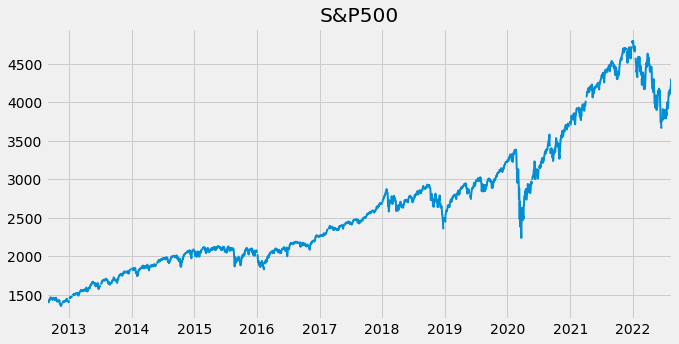

In [20]:
sp500.plot(figsize=(10,5), title='S&P500', lw=2)

#### 4. Pull and join multiple FRED data series

In [21]:
unemp_results = fred.search('unemployment')

In [22]:
unemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-08-21,2022-08-21,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:02-05:00,91,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-08-21,2022-08-21,Unemployment Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-08-05 07:43:03-05:00,52,The unemployment rate represents the number of...
NROU,NROU,2022-08-21,2022-08-21,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,65,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2022-08-21,2022-08-21,Continued Claims (Insured Unemployment),1967-01-07,2022-08-06,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-08-18 07:40:01-05:00,70,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2022-08-21,2022-08-21,Unemployment Level,1948-01-01,2022-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-08-05 07:44:11-05:00,64,The series comes from the 'Current Population ...


In [23]:
unrate = fred.get_series('UNRATE')

In [25]:
unrate.tail()

2022-03-01    3.6
2022-04-01    3.6
2022-05-01    3.6
2022-06-01    3.6
2022-07-01    3.5
dtype: float64

<AxesSubplot:title={'center':'Unemployment Rate'}>

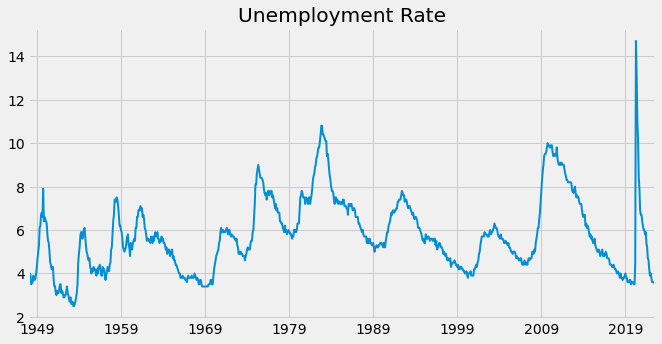

In [26]:
unrate.plot(figsize=(10,5), title='Unemployment Rate', lw=2)

In [29]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")

In [38]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [45]:
unemp_df = unemp_df.loc[unemp_df['id'].str.contains('UR')]

In [50]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [89]:
unemp_states = pd.concat(all_results, axis=1)

In [90]:
unemp_states.head(10)

,CAUR,FLUR,TXUR,NYUR,OHUR,PAUR,ALUR,MIUR,NCUR,GAUR,NJUR,ILUR,WIUR,AZUR,MNUR,WAUR,MAUR,TNUR,COUR,INUR,MOUR,KYUR,SCUR,ORUR,LAUR,VAUR,NMUR,ARUR,UTUR,WVUR,OKUR,IAUR,AKUR,NDUR,KSUR,MDUR,NVUR,MTUR,DCUR,HIUR,CTUR,SDUR,MSUR,IDUR,NEUR,DEUR,WYUR,MEUR,RIUR,NHUR,VTUR,PRUR,CNERUR,CMWRUR,CSOUUR,USAURAMS,CWSTUR,CNEWUR,CMATUR
1976-01-01,9.2,9.7,5.8,10.3,8.1,8.0,6.6,9.9,6.4,8.4,10.3,6.6,5.8,10.2,6.0,8.5,10.5,6.0,5.8,6.6,5.9,5.6,7.4,9.5,6.3,6.1,8.6,7.3,5.8,7.5,5.8,4.3,7.1,3.4,4.2,6.4,9.2,5.8,8.7,9.8,9.8,3.3,6.7,5.6,3.3,8.0,4.1,8.7,7.8,6.5,8.6,19.6,9.6,6.8,6.9,NaN,8.6,9.6,9.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,8.1,6.6,9.9,6.4,8.4,10.3,6.6,5.8,10.2,6.0,8.5,10.5,6.0,5.7,6.6,5.9,5.6,7.4,9.5,6.3,6.1,8.7,7.3,5.9,7.5,5.8,4.3,7.1,3.4,4.2,6.4,9.2,5.8,8.7,9.8,9.8,3.3,6.7,5.6,3.3,8.0,4.1,8.7,7.8,6.5,8.6,19.5,9.6,6.8,6.9,NaN,8.6,9.6,9.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,8.1,6.6,9.9,6.4,8.4,10.3,6.6,5.7,10.1,5.9,8.4,10.5,6.0,5.7,6.5,5.9,5.6,7.3,9.4,6.3,6.1,8.7,7.3,5.8,7.5,5.8,4.3,7.0,3.4,4.2,6.4,9.2,5.8,8.6,9.8,9.8,3.2,6.6,5.6,3.3,8.0,4.1,8.6,7.7,6.5,8.6,19.3,9.6,6.8,6.9,NaN,8.6,9.6,9.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,8.1,6.5,9.8,6.3,8.3,10.3,6.6,5.6,10.0,5.8,8.5,10.3,6.0,5.6,6.3,6.0,5.6,7.2,9.2,6.4,6.0,8.6,7.2,5.8,7.5,5.8,4.2,6.9,3.5,4.2,6.4,9.0,5.8,8.5,9.7,9.6,3.1,6.4,5.6,3.2,8.1,4.0,8.6,7.7,6.5,8.6,19.0,9.5,6.7,6.8,NaN,8.5,9.4,9.5
1976-05-01,9.0,9.3,5.9,10.1,7.8,8.1,6.4,9.6,6.1,8.1,10.3,6.6,5.5,9.8,5.7,8.5,10.1,5.9,5.6,6.0,6.0,5.5,7.0,9.1,6.5,5.9,8.6,7.1,5.7,7.4,5.7,4.1,6.9,3.6,4.2,6.5,8.9,5.8,8.4,9.4,9.4,3.1,6.3,5.6,3.1,8.3,3.9,8.5,7.7,6.5,8.5,18.9,9.5,6.6,6.7,NaN,8.5,9.3,9.5
1976-06-01,9.0,9.2,5.9,10.2,7.6,8.0,6.5,9.4,6.0,8.0,10.3,6.6,5.4,9.7,5.6,8.6,9.8,5.9,5.6,5.8,6.1,5.5,6.9,9.0,6.7,5.8,8.6,6.9,5.6,7.4,5.6,4.0,7.1,3.7,4.1,6.5,8.7,5.8,8.3,9.2,9.3,3.1,6.2,5.6,3.1,8.6,3.8,8.4,7.7,6.5,8.4,18.9,9.4,6.5,6.7,NaN,8.4,9.1,9.5
1976-07-01,9.0,9.1,5.9,10.2,7.5,7.9,6.6,9.2,5.9,8.0,10.4,6.6,5.3,9.7,5.6,8.7,9.6,6.0,5.8,5.7,6.2,5.4,6.8,9.1,6.8,5.8,8.6,6.8,5.5,7.2,5.6,4.0,7.3,3.8,4.1,6.6,8.6,5.9,8.4,9.0,9.1,3.2,6.2,5.6,3.0,8.8,3.7,8.4,7.8,6.4,8.3,19.1,9.4,6.5,6.7,NaN,8.5,9.0,9.5
1976-08-01,9.1,9.1,5.8,10.2,7.5,7.9,6.7,9.1,5.9,8.0,10.4,6.6,5.3,9.6,5.7,8.9,9.4,6.1,5.9,5.7,6.3,5.4,6.8,9.2,6.8,5.8,8.6,6.7,5.4,7.1,5.5,3.9,7.6,3.9,4.1,6.6,8.6,5.9,8.5,8.9,9.0,3.3,6.3,5.6,3.1,8.9,3.7,8.5,8.0,6.4,8.2,19.4,9.3,6.4,6.7,NaN,8.6,8.8,9.5
1976-09-01,9.2,9.1,5.7,10.2,7.5,7.9,6.8,9.0,6.0,8.0,10.4,6.6,5.4,9.6,5.7,9.0,9.2,6.1,6.1,5.7,6.4,5.3,6.8,9.2,6.9,5.8,8.7,6.6,5.4,6.9,5.4,3.9,8.0,4.0,4.1,6.7,8.6,5.9,8.7,8.8,8.8,3.4,6.4,5.6,3.1,9.0,3.7,8.6,8.2,6.3,8.0,19.8,9.3,6.4,6.7,NaN,8.6,8.7,9.5
1976-10-01,9.3,9.1,5.7,10.2,7.5,7.9,6.9,9.0,6.2,8.1,10.5,6.5,5.4,9.5,5.8,9.1,9.1,6.3,6.3,5.8,6.5,5.2,6.8,9.3,6.9,5.7,8.9,6.6,5.4,6.8,5.4,4.0,8.3,4.1,4.1,6.7,8.6,6.0,8.8,8.7,8.7,3.5,6.6,5.7,3.1,9.1,3.7,8.8,8.4,6.3,7.9,19.9,9.3,6.5,6.7,NaN,8.7,8.7,9.5


In [91]:
#unemp_states = unemp_states.drop([['CNERUR','CMWRUR','CSOUUR','USAURAMS','CWSTUR','CNEWUR','CMATUR']],axis=1)
unemp_states = unemp_states.dropna(axis=1)
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
#update columns with the proper state name 
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [135]:
unemp_states.columns = [x.strip(' ') for x in unemp_states.columns]

In [66]:
unemp_states.shape

(558, 57)

In [92]:
#plotting states unemplyment rate
px.line(unemp_states)

#### Pull April 2020 unemplyment rate per state

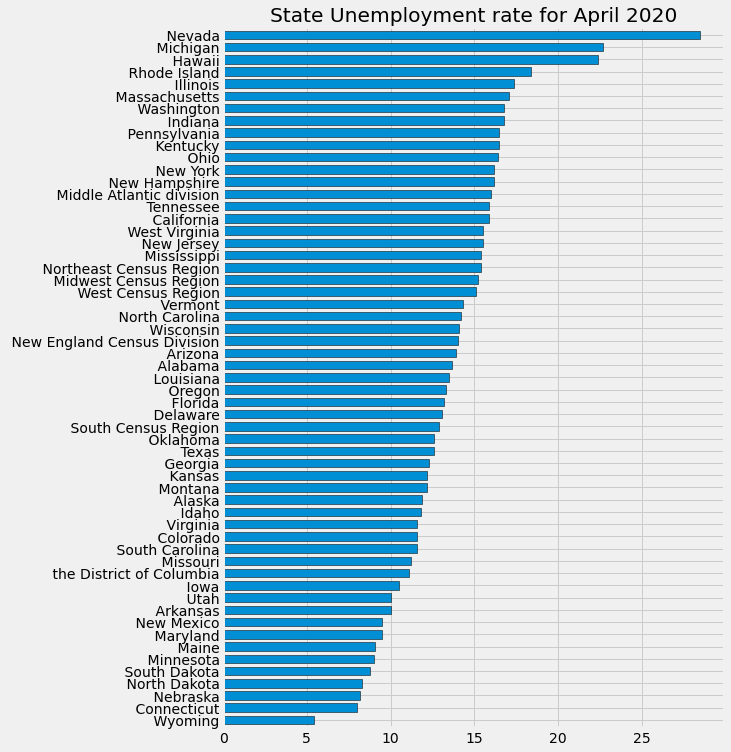

In [96]:
from turtle import width


ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind = 'barh', figsize=(8,12), width=0.7, edgecolor='black', 
        title='State Unemployment rate for April 2020')

ax.legend().remove()
plt.show()

#### Pull participation rate

In [97]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")

In [100]:
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2022-08-21,2022-08-21,Labor Force Participation Rate,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:02-05:00,86,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2022-08-21,2022-08-21,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:10-05:00,67,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2022-08-21,2022-08-21,Labor Force Participation Rate - Women,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:13-05:00,63,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2022-08-21,2022-08-21,Labor Force Participation Rate - Men,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:14-05:00,56,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2022-08-21,2022-08-21,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-05 07:44:16-05:00,51,The series comes from the 'Current Population ...


In [106]:
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for ')]
part_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2022-08-21,2022-08-21,Labor Force Participation Rate for California,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-19 09:01:01-05:00,28,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2022-08-21,2022-08-21,Labor Force Participation Rate for Minnesota,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-19 09:01:02-05:00,35,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2022-08-21,2022-08-21,Labor Force Participation Rate for Florida,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-19 09:01:03-05:00,30,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2022-08-21,2022-08-21,Labor Force Participation Rate for Alabama,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-19 09:01:10-05:00,14,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2022-08-21,2022-08-21,Labor Force Participation Rate for Kentucky,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-19 09:01:03-05:00,25,A state's labor-force participation rate is th...


In [123]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_states = pd.concat(all_results,axis=1)

In [124]:
partId_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()

In [125]:
part_states.columns = [partId_to_state[c] for c in part_states.columns]

In [128]:
part_states.columns = [x.strip(' ') for x in part_states.columns]

In [129]:
part_states.head()

,California,Minnesota,Florida,Alabama,Kentucky,Wisconsin,Texas,Ohio,New York,Pennsylvania,Michigan,North Carolina,West Virginia,Iowa,New Mexico,Colorado,Illinois,Georgia,Missouri,Tennessee,Indiana,Virginia,Arizona,Oregon,Massachusetts,Nebraska,Arkansas,Washington,Maryland,Utah,New Jersey,Alaska,Louisiana,Nevada,Connecticut,Kansas,South Carolina,Mississippi,Maine,Montana,District Of Columbia,Vermont,Oklahoma,South Dakota,Rhode Island,New Hampshire,Idaho,Wyoming,Delaware,North Dakota,Hawaii
1976-01-01,62.6,65.6,55.8,57.0,60.5,65.6,63.8,61.7,58.0,58.4,61.6,66.5,52.5,64.4,60.8,67.2,63.0,63.7,60.5,59.6,64.0,65.9,59.5,62.9,64.8,64.9,57.9,60.9,64.3,62.8,61.5,69.0,56.8,71.3,64.2,65.1,65.3,58.8,62.1,62.7,64.4,63.6,59.3,64.6,63.8,65.9,63.0,65.3,62.7,62.6,69.9
1976-02-01,62.4,65.5,55.7,56.9,60.3,65.5,63.5,61.7,58.0,58.3,61.5,66.3,52.4,64.3,60.5,67.0,63.0,63.6,60.3,59.4,63.9,65.8,59.2,62.7,64.7,64.9,57.8,60.7,64.2,62.6,61.4,68.4,56.6,70.8,64.1,65.0,65.2,58.6,61.9,62.5,64.5,63.4,59.2,64.4,63.7,65.6,62.8,64.9,62.5,62.4,69.6
1976-03-01,62.2,65.4,55.5,56.8,60.2,65.4,63.4,61.7,58.0,58.3,61.5,66.2,52.3,64.2,60.3,66.8,62.9,63.5,60.3,59.3,63.8,65.6,59.1,62.5,64.6,64.8,57.7,60.6,64.1,62.5,61.4,67.8,56.5,70.5,64.0,64.9,65.0,58.5,61.9,62.4,64.5,63.2,59.1,64.4,63.6,65.6,62.7,64.7,62.5,62.3,69.6
1976-04-01,62.2,65.4,55.5,56.8,60.1,65.4,63.5,61.6,58.0,58.3,61.6,66.2,52.3,64.1,60.3,66.6,62.9,63.5,60.4,59.3,63.8,65.5,59.1,62.4,64.6,64.8,57.7,60.6,64.1,62.5,61.5,67.9,56.4,70.4,64.1,65.0,64.9,58.5,61.8,62.3,64.5,63.5,59.0,64.3,63.7,65.7,62.7,64.9,62.4,62.5,69.4
1976-05-01,62.3,65.5,55.4,56.8,60.1,65.5,63.6,61.6,58.1,58.3,61.7,66.3,52.2,64.1,60.3,66.5,63.0,63.6,60.6,59.4,63.9,65.4,59.1,62.5,64.6,64.8,57.7,60.7,64.1,62.6,61.6,67.9,56.4,70.5,64.3,65.1,64.7,58.5,61.7,62.2,64.4,63.6,59.0,64.3,63.6,66.0,62.8,65.2,62.4,62.6,69.3


#### Plot Unemployment vs Participation

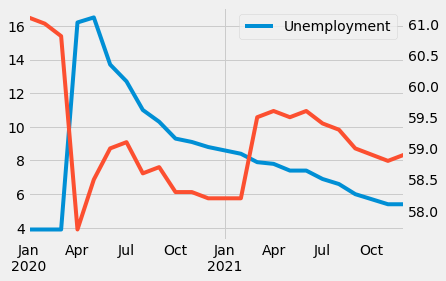

In [142]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

unemp_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='Unemployment')
part_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax2, label='Participation',color=color_pal[1])
ax2.grid(False)

ax.legend()


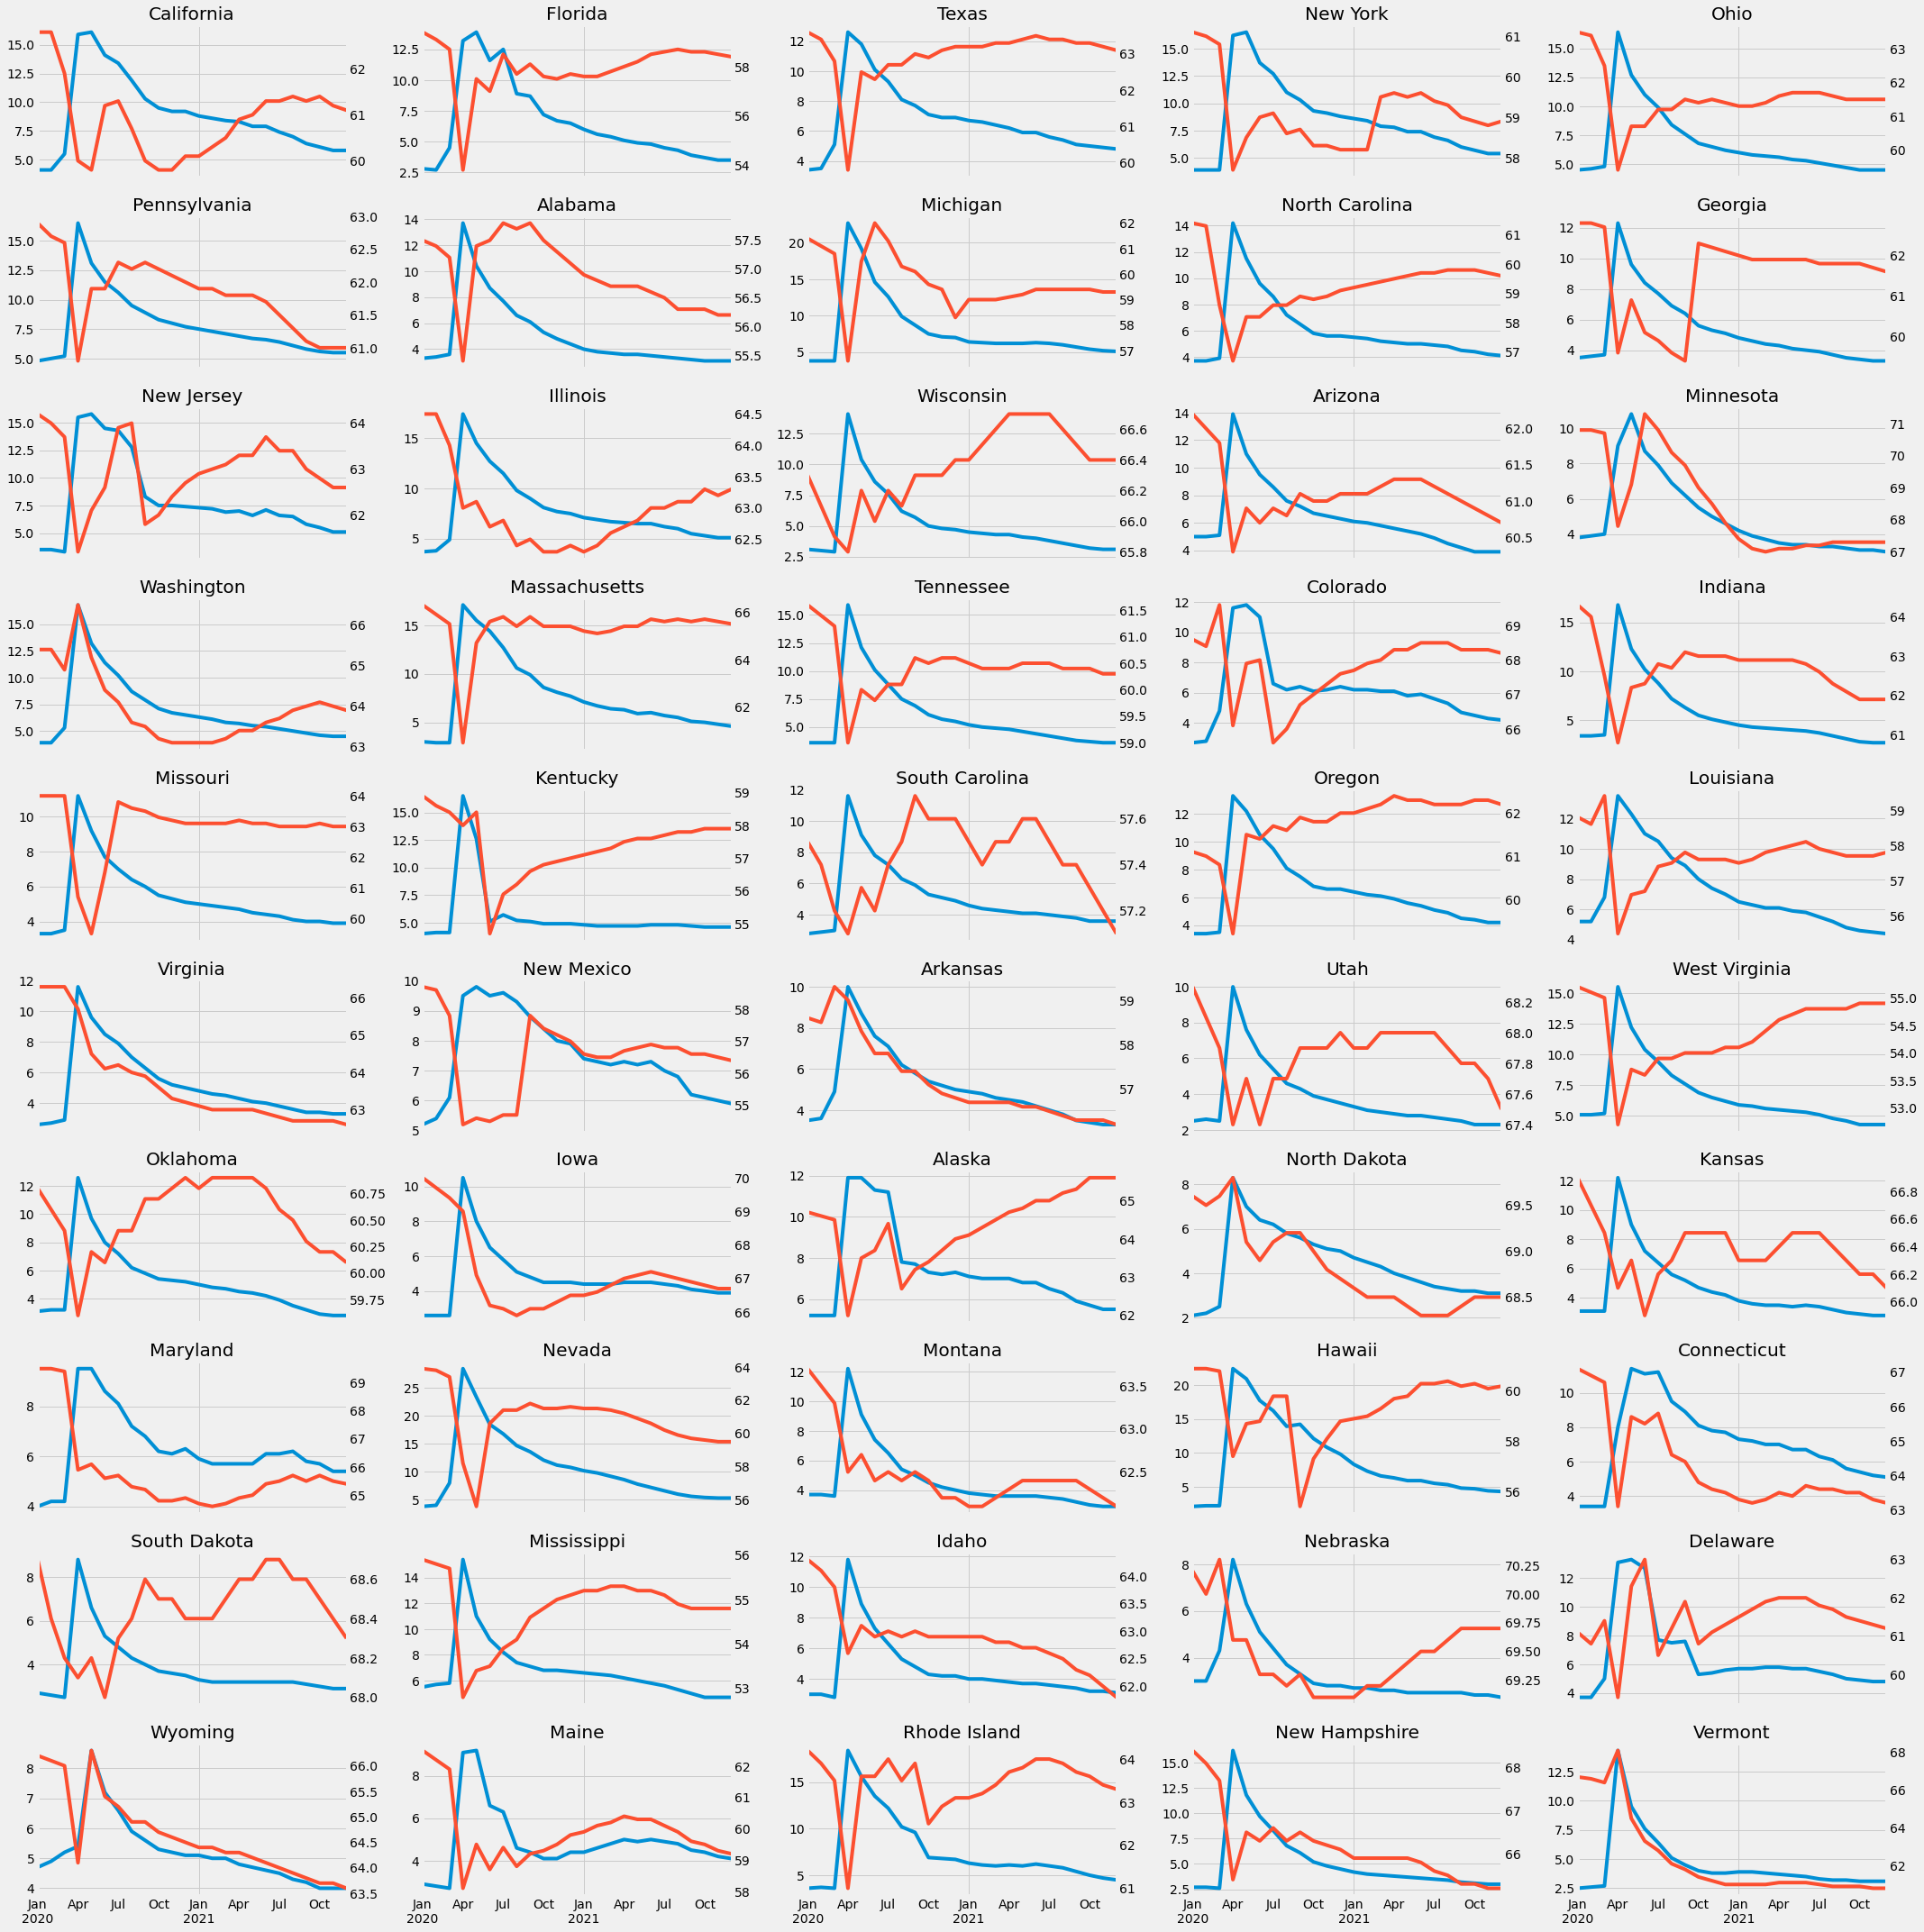

In [157]:
fig, ax = plt.subplots(10,5, figsize=(30,30), sharex=True)
axs = ax.flatten()

i = 0
for state in unemp_states.columns:
    if state == 'District of Columbia':
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation',color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

In [148]:
unemp_states.columns

Index(['California', 'Florida', 'Texas', 'New York', 'Ohio', 'Pennsylvania',
       'Alabama', 'Michigan', 'North Carolina', 'Georgia', 'New Jersey',
       'Illinois', 'Wisconsin', 'Arizona', 'Minnesota', 'Washington',
       'Massachusetts', 'Tennessee', 'Colorado', 'Indiana', 'Missouri',
       'Kentucky', 'South Carolina', 'Oregon', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Utah', 'West Virginia', 'Oklahoma', 'Iowa',
       'Alaska', 'North Dakota', 'Kansas', 'Maryland', 'Nevada', 'Montana',
       'the District of Columbia', 'Hawaii', 'Connecticut', 'South Dakota',
       'Mississippi', 'Idaho', 'Nebraska', 'Delaware', 'Wyoming', 'Maine',
       'Rhode Island', 'New Hampshire', 'Vermont', 'Northeast Census Region',
       'Midwest Census Region', 'South Census Region', 'West Census Region',
       'New England Census Division', 'Middle Atlantic division'],
      dtype='object')

In [151]:
unemp_states.drop(['Northeast Census Region','Midwest Census Region', 'South Census Region', 'West Census Region',
       'New England Census Division', 'Middle Atlantic division'],axis=1,inplace=True)

In [155]:
#rename DC
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District of Columbia'})

In [154]:
part_states.columns

Index(['California', 'Minnesota', 'Florida', 'Alabama', 'Kentucky',
       'Wisconsin', 'Texas', 'Ohio', 'New York', 'Pennsylvania', 'Michigan',
       'North Carolina', 'West Virginia', 'Iowa', 'New Mexico', 'Colorado',
       'Illinois', 'Georgia', 'Missouri', 'Tennessee', 'Indiana', 'Virginia',
       'Arizona', 'Oregon', 'Massachusetts', 'Nebraska', 'Arkansas',
       'Washington', 'Maryland', 'Utah', 'New Jersey', 'Alaska', 'Louisiana',
       'Nevada', 'Connecticut', 'Kansas', 'South Carolina', 'Mississippi',
       'Maine', 'Montana', 'District Of Columbia', 'Vermont', 'Oklahoma',
       'South Dakota', 'Rhode Island', 'New Hampshire', 'Idaho', 'Wyoming',
       'Delaware', 'North Dakota', 'Hawaii'],
      dtype='object')